In [ ]:
!pip install botorch

  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_nccl_cu12-2.20.5-py3-none-manylinux2014_x86_64.whl.metadata (1.8 kB)
  Using cached nvidia_nvtx_cu12-12.1.105-py3-none-manylinu

In [ ]:
from botorch.test_functions.synthetic import Ackley, Branin,Levy
from botorch.acquisition import LogExpectedImprovement
import torch
from botorch.models import SingleTaskGP
from botorch.models.transforms import Normalize, Standardize
from botorch.fit import fit_gpytorch_mll
from gpytorch.priors.torch_priors import LogNormalPrior
import numpy as np
from gpytorch.mlls import ExactMarginalLogLikelihood
import matplotlib.pyplot as plt
from tqdm import trange,tqdm_notebook
from tqdm.notebook import tqdm as tqdm_notebook

device= 'cuda' if torch.cuda.is_available() else 'cpu'

高次元ガウス過程の検証

In [ ]:

def f(X):
  """
  function f = \sum x^2
  """
  d = X.shape[-1]
  return torch.sum((X-r)**2,dim=1)


In [ ]:
dim = 64
r = torch.rand(dim,dtype=torch.float64).to(device)

initial_points_num = 500
iter_num=10
func = f
sample_num =100
sample_point_num = 100
bounds = torch.stack([torch.zeros(dim), torch.ones(dim)]).to(torch.double).to(device)


batch = 10


In [ ]:
data_X = torch.rand([initial_points_num,dim],dtype=torch.float64).to(device)
data_y = func(data_X).unsqueeze(1)


normal_gp = SingleTaskGP(
    train_X=data_X,
    train_Y=data_y,
    train_Yvar=1e-5 * torch.ones_like(data_y),
    input_transform=Normalize(d=dim),
    outcome_transform=Standardize(m=1),
)

mll = ExactMarginalLogLikelihood(normal_gp.likelihood, normal_gp)
fit_gpytorch_mll(mll)

normal_gp.covar_module

ScaleKernel(
  (base_kernel): MaternKernel(
    (lengthscale_prior): GammaPrior()
    (raw_lengthscale_constraint): Positive()
  )
  (outputscale_prior): GammaPrior()
  (raw_outputscale_constraint): Positive()
)

In [ ]:
from botorch.optim.utils import get_parameters_and_bounds

get_parameters_and_bounds(mll)
for name, module, prior, closure, _ in mll.model.named_priors():
  print('dd')
  print(name, module, prior, closure)
  prior_term = prior.log_prob(closure(module))
  print(prior_term)

dd
covar_module.outputscale_prior ScaleKernel(
  (base_kernel): MaternKernel(
    (lengthscale_prior): GammaPrior()
    (raw_lengthscale_constraint): Positive()
  )
  (outputscale_prior): GammaPrior()
  (raw_outputscale_constraint): Positive()
) GammaPrior() <bound method ScaleKernel._outputscale_param of ScaleKernel(
  (base_kernel): MaternKernel(
    (lengthscale_prior): GammaPrior()
    (raw_lengthscale_constraint): Positive()
  )
  (outputscale_prior): GammaPrior()
  (raw_outputscale_constraint): Positive()
)>
tensor(-3.9431, dtype=torch.float64, grad_fn=<SubBackward0>)
dd
covar_module.base_kernel.lengthscale_prior MaternKernel(
  (lengthscale_prior): GammaPrior()
  (raw_lengthscale_constraint): Positive()
) GammaPrior() <bound method Kernel._lengthscale_param of MaternKernel(
  (lengthscale_prior): GammaPrior()
  (raw_lengthscale_constraint): Positive()
)>
tensor([[0.4849, 0.4849, 0.4849, 0.4849, 0.4849, 0.4849, 0.4849, 0.4849, 0.4849,
         0.4849, 0.4849, 0.4849, 0.4849, 0.48

In [ ]:
print(normal_gp.covar_module.base_kernel.lengthscale)

tensor([[0.3335, 0.3336, 0.3335, 0.3335, 0.3335, 0.3336, 0.3335, 0.3335, 0.3336,
         0.3335, 0.3335, 0.3335, 0.3335, 0.3336, 0.3335, 0.3336, 0.3335, 0.3335,
         0.3334, 0.3335, 0.3335, 0.3335, 0.3335, 0.3335, 0.3335, 0.3335, 0.3334,
         0.3334, 0.3335, 0.3335, 0.3335, 0.3335, 0.3335, 0.3335, 0.3335, 0.3335,
         0.3335, 0.3335, 0.3334, 0.3335, 0.3335, 0.3335, 0.3335, 0.3335, 0.3335,
         0.3336, 0.3335, 0.3336, 0.3335, 0.3334, 0.3335, 0.3335, 0.3335, 0.3335,
         0.3335, 0.3335, 0.3335, 0.3335, 0.3335, 0.3336, 0.3335, 0.3335, 0.3335,
         0.3336]], dtype=torch.float64, grad_fn=<SoftplusBackward0>)


In [ ]:
for p in normal_gp.covar_module.named_parameters():
  print(p)

('raw_outputscale', Parameter containing:
tensor(0.5435, dtype=torch.float64, requires_grad=True))
('base_kernel.raw_lengthscale', Parameter containing:
tensor([[-0.9268, -0.9269, -0.9267, -0.9269, -0.9264, -0.9267, -0.9270, -0.9267,
         -0.9271, -0.9269, -0.9267, -0.9267, -0.9265, -0.9266, -0.9269, -0.9267,
         -0.9267, -0.9267, -0.9270, -0.9262, -0.9269, -0.9266, -0.9267, -0.9266,
         -0.9263, -0.9284, -0.9267, -0.9270, -0.9268, -0.9267, -0.9268, -0.9269,
         -0.9266, -0.9268, -0.9270, -0.9267, -0.9270, -0.9270, -0.9268, -0.9269,
         -0.9266, -0.9268, -0.9270, -0.9267, -0.9272, -0.9267, -0.9268, -0.9264,
         -0.9267, -0.9263, -0.9266, -0.9271, -0.9269, -0.9271, -0.9268, -0.9262,
         -0.9272, -0.9268, -0.9270, -0.9269, -0.9268, -0.9271, -0.9269, -0.9269]],
       dtype=torch.float64, requires_grad=True))


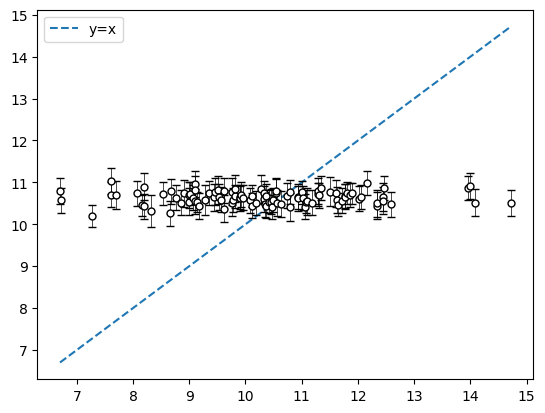

In [ ]:
data_X = torch.rand([initial_points_num,dim],dtype=torch.float64).to(device)
data_y = func(data_X).unsqueeze(1)


normal_gp = SingleTaskGP(
    train_X=data_X,
    train_Y=data_y,
    train_Yvar=1e-5 * torch.ones_like(data_y),
    input_transform=Normalize(d=dim),
    outcome_transform=Standardize(m=1),
)

mll = ExactMarginalLogLikelihood(normal_gp.likelihood, normal_gp)
fit_gpytorch_mll(mll)


X = torch.rand([sample_point_num,dim],dtype=torch.float64).to(device)
y = func(X)

pred = normal_gp.posterior(X).sample(torch.Size([sample_num]))
pred= pred.squeeze(-1)
mean = pred.mean(0)
ci = 1.96 * pred.std(0) / np.sqrt(sample_num)

values = torch.stack([y,mean,ci],dim=1)
values = values.cpu().detach().numpy()
values = values[np.argsort(values[:,0])]


## plot y = x
plt.plot(values[:,0],values[:,0],linestyle="dashed",label='y=x', )
plt.errorbar(values[:,0],values[:,1], yerr=values[:,2],label="", capsize=3, fmt='.', markersize=10, ecolor="black", elinewidth=0.5, markeredgecolor="black", color="w")

plt.legend()
plt.show()

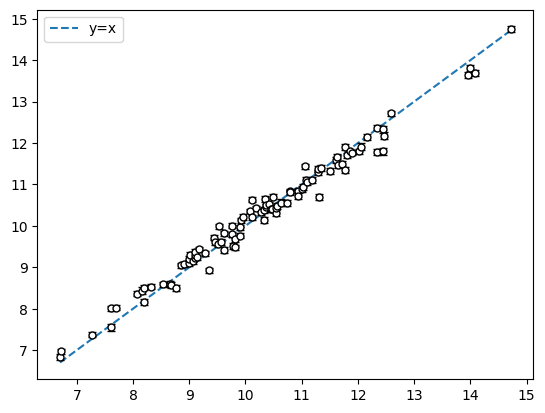

In [ ]:
from gpytorch.priors.torch_priors import LogNormalPrior
from gpytorch.kernels import MaternKernel, ScaleKernel
from gpytorch.priors import GammaPrior

mu_0 = 0.0
sigma_0=1.0

#data_X = torch.rand([initial_points_num,dim],dtype=torch.float64)
#ata_y = func(data_X).unsqueeze(1)


normal_gp = SingleTaskGP(
    train_X=data_X,
    train_Y=data_y,
    train_Yvar=1e-5 * torch.ones_like(data_y),
    input_transform=Normalize(d=dim),
    outcome_transform=Standardize(m=1),
    covar_module=ScaleKernel(
        base_kernel=MaternKernel(
            nu=2.5,
            ard_num_dims=dim,
            lengthscale_prior=LogNormalPrior(mu_0 + np.log(dim)/ 2, sigma_0),
        ),
        outputscale_prior=GammaPrior(2.0, 0.15),
    )
)

mll = ExactMarginalLogLikelihood(normal_gp.likelihood, normal_gp)
fit_gpytorch_mll(mll)

#X = torch.rand([30,dim],dtype=torch.float64)
#y = func(X)

pred = normal_gp.posterior(X).sample(torch.Size([sample_num]))
pred= pred.squeeze(-1)
mean = pred.mean(0)
ci = 1.96 * pred.std(0) / np.sqrt(sample_num)

values = torch.stack([y,mean,ci],dim=1).detach().numpy()
values = values[np.argsort(values[:,0])]

## plot y = x
plt.plot(values[:,0],values[:,0],linestyle="dashed",label='y=x', )
plt.errorbar(values[:,0],values[:,1], yerr=values[:,2],label="", capsize=3, fmt='.', markersize=10, ecolor="black", elinewidth=0.5, markeredgecolor="black", color="w")

plt.legend()
plt.show()

In [ ]:
from botorch.optim import optimize_acqf
from botorch.acquisition import LogExpectedImprovement,ExpectedImprovement

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

 10%|█         | 1/10 [00:18<02:42, 18.02s/it]

  0%|          | 0/10 [00:00<?, ?it/s]

 20%|██        | 2/10 [00:45<03:08, 23.53s/it]

  0%|          | 0/10 [00:00<?, ?it/s]

 30%|███       | 3/10 [01:09<02:44, 23.56s/it]

  0%|          | 0/10 [00:00<?, ?it/s]

 40%|████      | 4/10 [01:30<02:15, 22.60s/it]

  0%|          | 0/10 [00:00<?, ?it/s]

 50%|█████     | 5/10 [01:52<01:52, 22.58s/it]

  0%|          | 0/10 [00:00<?, ?it/s]

 60%|██████    | 6/10 [02:22<01:39, 24.97s/it]

  0%|          | 0/10 [00:00<?, ?it/s]

 70%|███████   | 7/10 [02:47<01:15, 25.16s/it]

  0%|          | 0/10 [00:00<?, ?it/s]

 80%|████████  | 8/10 [03:26<00:59, 29.51s/it]

  0%|          | 0/10 [00:00<?, ?it/s]

 90%|█████████ | 9/10 [03:58<00:30, 30.34s/it]

  0%|          | 0/10 [00:00<?, ?it/s]

100%|██████████| 10/10 [04:22<00:00, 26.25s/it]


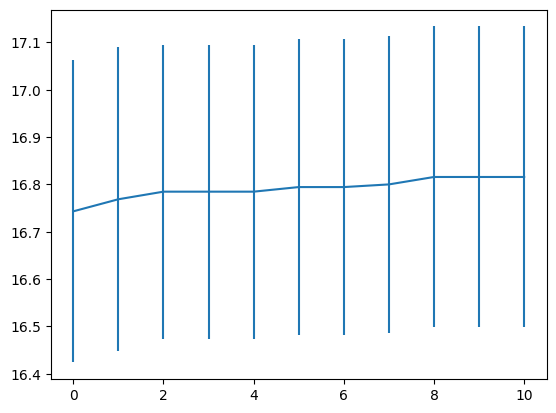

In [ ]:



all_best = []
for _ in trange(batch):
  initial_X = torch.rand([initial_points_num,dim],dtype=torch.float64).to(device)
  initial_y = func(initial_X).unsqueeze(1)

  train_X = initial_X
  train_y = initial_y
  best = [train_y.max().item()]

  for i in tqdm_notebook(range(iter_num)):
    gp = SingleTaskGP(
      train_X=train_X,
      train_Y=train_y,
      input_transform=Normalize(d=dim),
      outcome_transform=Standardize(m=1),
    )
    # gp.covar_module.base_kernel.lengthscale_prior = LogNormalPrior(mu_0 +np.log(n_dim)/2, sigma_0)

    mll = ExactMarginalLogLikelihood(gp.likelihood, gp)
    fit_gpytorch_mll(mll)
    logEI = LogExpectedImprovement(model=gp, best_f=train_y.max())
    candidate, acq_value = optimize_acqf(
      logEI, bounds=bounds, q=1, num_restarts=5, raw_samples=50,
    )

    y = func(candidate).unsqueeze(0)

    train_X = torch.cat([train_X, candidate], dim=0)
    train_y = torch.cat([train_y, y], dim=0)

    best.append(train_y.max().item())
  all_best.append(best)



plt.errorbar(range(iter_num+1), np.mean(all_best,axis=0), yerr=1.96 * np.std(all_best,axis=0) / np.sqrt(batch))
plt.show()

tensor([0.3061, 0.4294, 0.2405, 0.1432, 0.7196, 0.7966, 0.7850, 0.0052, 0.9072,
        0.9637, 0.8212, 0.9495, 0.0396, 0.3926, 0.6780, 0.0257, 0.4870, 0.9808,
        0.4847, 0.0281, 0.9396, 0.9816, 0.7415, 0.9115, 0.9024, 0.6180, 0.6827,
        0.7998, 0.1105, 0.8830, 0.7207, 0.2606, 0.1349, 0.8086, 0.9877, 0.1455,
        0.8291, 0.5313, 0.6780, 0.5301, 0.0831, 0.7812, 0.7643, 0.0566, 0.5057,
        0.6203, 0.3530, 0.1267, 0.7082, 0.9000, 0.6247, 0.3291, 0.6631, 0.3378,
        0.8067, 0.9819, 0.1960, 0.4431, 0.5946, 0.0297, 0.3124, 0.6927, 0.0104,
        0.8205], device='cuda:0', dtype=torch.float64)

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

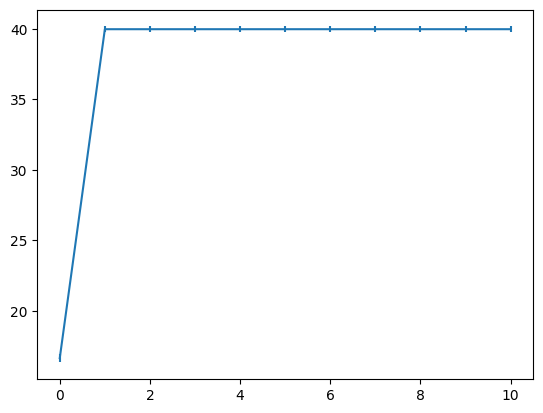

In [ ]:
from gpytorch.priors.torch_priors import LogNormalPrior
from gpytorch.kernels import MaternKernel, ScaleKernel
from gpytorch.priors import GammaPrior


all_best = []
for _ in tqdm_notebook(range(batch)):
  initial_X = torch.rand([initial_points_num,dim],dtype=torch.float64).to(device)
  initial_y = func(initial_X).unsqueeze(1)

  train_X = initial_X
  train_y = initial_y
  best = [train_y.max().item()]

  for i in tqdm_notebook(range(iter_num)):
    gp = SingleTaskGP(
      train_X=train_X,
      train_Y=train_y,
      input_transform=Normalize(d=dim),
      outcome_transform=Standardize(m=1),
      covar_module=ScaleKernel(
        base_kernel=MaternKernel(
            nu=2.5,
            ard_num_dims=dim,
            lengthscale_prior=LogNormalPrior(mu_0 + np.log(dim)/ 2, sigma_0),
        ),
        outputscale_prior=GammaPrior(2.0, 0.15),
      )
    )
    gp.covar_module.base_kernel.lengthscale_prior = LogNormalPrior(mu_0 +np.log(dim)/2, sigma_0)

    mll = ExactMarginalLogLikelihood(gp.likelihood, gp)
    fit_gpytorch_mll(mll)
    logEI = LogExpectedImprovement(model=gp, best_f=train_y.max())
    candidate, acq_value = optimize_acqf(
      logEI, bounds=bounds, q=1, num_restarts=5, raw_samples=20,
    )

    y = func(candidate).unsqueeze(0)

    train_X = torch.cat([train_X, candidate], dim=0)
    train_y = torch.cat([train_y, y], dim=0)

    best.append(train_y.max().item())
  all_best.append(best)


plt.errorbar(range(iter_num+1), np.mean(all_best,axis=0), yerr=1.96 * np.std(all_best,axis=0) / np.sqrt(batch))
plt.show()
